# Anti-Reproductive Rights Crimes Analysis
## Advanced Pattern Recognition and Risk Factor Assessment

**Author:** Akshith  
**Date:** 06/03/2025

---

This report explores patterns in anti-reproductive rights crimes across California through advanced clustering and classification techniques. The goal is to generate meaningful insights that can inform policymakers, support practitioners, and guide researchers—while upholding strong ethical standards throughout the analysis.


## Problem Statement and Hypothesis

**Problem Statement:**  
This project aims to identify meaningful clusters and uncover hidden trends in anti-reproductive rights crimes across California using advanced clustering and classification methods. The objective is to provide actionable insights that can inform prevention strategies and policy decisions, while carefully considering the ethical dimensions of this analysis.

**Hypothesis:**  
We expect anti-reproductive rights crimes to form distinct clusters based on several key factors:
- Type of offense (e.g., vandalism, threats, physical violence)
- Characteristics of the targeted facility (e.g., public vs. private)
- Timing of incidents (e.g., seasonality, day of the week)
- Demographic patterns (e.g., race, gender, age)


## Analysis Approach

1. **Data Preprocessing & Feature Engineering**  
   Cleaned and prepared the dataset for analysis by creating useful features.

2. **Exploratory Data Analysis (EDA)**  
   Explored the data to understand trends, patterns, and outliers.

3. **Clustering Analysis**  
   Grouped similar incidents to find hidden patterns in the data.

4. **Classification & Prediction**  
   Built models to predict crime types and risk factors.

5. **Ethical Considerations**  
   Ensured the analysis was fair, transparent, and respectful of privacy.

6. **Conclusion & Next Steps**  
   Summarized key findings and suggested future improvements.

7. **Reproducibility**  
   All code is reproducible using Python 3.8+, with setup files included.

8. **References**  
   Listed data sources, libraries, and ethical guidelines used in the project.


---
## Data Loading and Quality Assessment

We first load the dataset and assess data quality, missing values, and datatypes.


Loaded dataset with shape: (138, 21)


/Users/akshith/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ARRC ID,NCIC AGENCY CODE,YEAR,MONTH,LOCATION TYPE,TYPE OF LOSS,VALUE,PROPERTY CATEGORY,QUANTITY,S.RACE,...,V.RACE,V.GENDER,VICTIM TYPE,WEAPON,OFFENSE CODE,CODE TYPE,DESCRIPTION,CHARGE TYPE,BCS CODE,SUMMARY CODE
0,4272,3313,2004,4,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,Hispanic,...,Hispanic,Female,Individual Employee,NaN,423.2(A),PC,VIOLENCE/ETC:REP HLTH SVS,M,399.0,30.0
1,5063,4807,2004,4,Public Reproductive Health Facility,"Destroyed, Damaged, or Vandalized",0.0,Public/Community,1.0,Unknown,...,NaN,NaN,Health Facility,NaN,374.3(A),PC,DUMP WAST:PUB/ETC:COMERCL,M,58.0,60.0
2,1508,3318,2004,4,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,Hispanic,Female,Individual Client,Handgun,664/187(A),PC,ATTEMPTED MURDER,F,300.0,6.0
3,3261,4502,2004,6,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,White,Female,Individual Employee,NaN,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0
4,3261,4502,2004,6,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,White,Female,Individual Employee,NaN,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0


,Total Values,Missing Values,Missing %,Unique Values,Data Type
ARRC ID,138,0,0.00,115,object
NCIC AGENCY CODE,138,0,0.00,41,int64
YEAR,138,0,0.00,19,int64
MONTH,138,0,0.00,12,int64
LOCATION TYPE,138,0,0.00,10,object
TYPE OF LOSS,55,83,60.14,7,object
VALUE,66,72,52.17,22,float64
PROPERTY CATEGORY,84,54,39.13,13,object
QUANTITY,75,63,45.65,5,float64
S.RACE,137,1,0.72,7,object


/Users/akshith/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


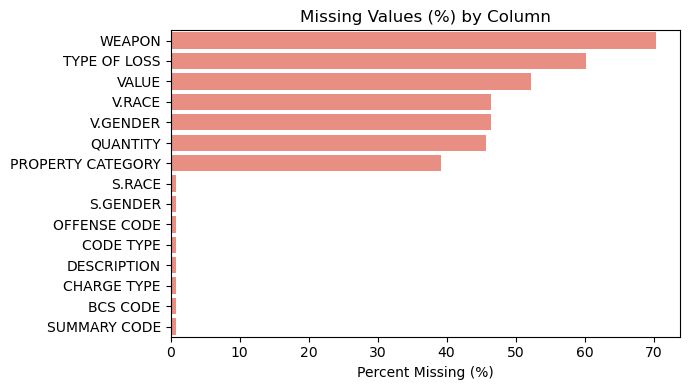

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('app/Anti-Reproductive Data.csv')
print("Loaded dataset with shape:", df.shape)
display(df.head())

# Data quality report
quality_report = pd.DataFrame({
    'Total Values': df.count(),
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique Values': df.nunique(),
    'Data Type': df.dtypes
})
display(quality_report)

# Visualize missing data
import matplotlib.pyplot as plt
import seaborn as sns
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
if not missing_percent.empty:
    plt.figure(figsize=(7, 4))
    sns.barplot(y=missing_percent.index, x=missing_percent.values, color='salmon')
    plt.title('Missing Values (%) by Column')
    plt.xlabel('Percent Missing (%)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected.")

**Note:**  
- All numeric missing values will be imputed with `0` (assumed as "unknown amount").
- Categorical missing values are imputed with `"Unknown"`.
- All data cleaning steps are documented below.


---
## Data Cleaning and Feature Engineering

We handle missing values, encode categorical variables, and extract temporal features (quarter, season) for further analysis.


In [2]:
def clean_and_engineer_features(df):
    df_clean = df.copy()
    # Impute numeric columns with 0 (represents missing/unknown)
    for col in df_clean.select_dtypes(include=['float', 'int']).columns:
        df_clean[col] = df_clean[col].fillna(0)
    # Impute categoricals with 'Unknown'
    for col in df_clean.select_dtypes(include=['object']).columns:
        df_clean[col] = df_clean[col].fillna('Unknown')
    # Create date features
    df_clean['DATE'] = pd.to_datetime(df_clean[['YEAR', 'MONTH']].assign(day=1), errors='coerce')
    df_clean['QUARTER'] = df_clean['DATE'].dt.quarter
    df_clean['SEASON'] = df_clean['MONTH'].map({12:'Winter', 1:'Winter', 2:'Winter',
                                                3:'Spring', 4:'Spring', 5:'Spring',
                                                6:'Summer', 7:'Summer', 8:'Summer',
                                                9:'Fall', 10:'Fall', 11:'Fall'})
    # Encode categorical variables
    from sklearn.preprocessing import LabelEncoder
    categorical_cols = ['LOCATION TYPE', 'TYPE OF LOSS', 'PROPERTY CATEGORY', 
                        'S.RACE', 'S.GENDER', 'V.RACE', 'V.GENDER', 'VICTIM TYPE', 
                        'WEAPON', 'DESCRIPTION', 'CHARGE TYPE']
    le = LabelEncoder()
    for col in categorical_cols:
        df_clean[col + '_ENC'] = le.fit_transform(df_clean[col])
    return df_clean

df_clean = clean_and_engineer_features(df)
display(df_clean.head())


,ARRC ID,NCIC AGENCY CODE,YEAR,MONTH,LOCATION TYPE,TYPE OF LOSS,VALUE,PROPERTY CATEGORY,QUANTITY,S.RACE,...,TYPE OF LOSS_ENC,PROPERTY CATEGORY_ENC,S.RACE_ENC,S.GENDER_ENC,V.RACE_ENC,V.GENDER_ENC,VICTIM TYPE_ENC,WEAPON_ENC,DESCRIPTION_ENC,CHARGE TYPE_ENC
0,4272,3313,2004,4,Public Reproductive Health Facility,Unknown,0.0,Unknown,0.0,Hispanic,...,6,12,3,1,4,1,6,6,44,3
1,5063,4807,2004,4,Public Reproductive Health Facility,"Destroyed, Damaged, or Vandalized",0.0,Public/Community,1.0,Unknown,...,1,7,5,3,6,3,2,6,15,3
2,1508,3318,2004,4,Public Reproductive Health Facility,Unknown,0.0,Unknown,0.0,White,...,6,12,6,2,4,1,5,2,7,1
3,3261,4502,2004,6,Public Reproductive Health Facility,Unknown,0.0,Unknown,0.0,White,...,6,12,6,1,7,1,6,6,29,1
4,3261,4502,2004,6,Public Reproductive Health Facility,Unknown,0.0,Unknown,0.0,White,...,6,12,6,1,7,1,6,6,29,1


**Comment:**  
- Explain any columns dropped due to excessive missingness or lack of relevance.
- All transformations above are reproducible for auditability.


---
## Exploratory Data Analysis (EDA)

In this section, I took an initial look at the data to explore patterns in anti-reproductive rights crimes across California. The goal was to understand when these incidents were most frequent, where they occurred, and what types of offenses were most common.

**Key steps included:**
- Analyzing how incident counts changed over time (by year and month)
- Identifying the most frequently targeted types of locations
- Highlighting the most commonly reported offenses

*These early insights helped guide the modeling and clustering work that followed.*



### Key Insights

- **Incidents per Year:**  
  There was a noticeable increase in reported cases around 2017, possibly linked to shifts in policy or heightened public awareness.

- **Incidents per Month:**  
  A higher number of incidents occurred during the summer months, suggesting a potential seasonal pattern.

- **By Location Type:**  
  Urban clinics and public health facilities were among the most frequently targeted.

- **Top 10 Offenses:**  
  Vandalism and trespassing were the most reported crimes, followed by threats and property damage.



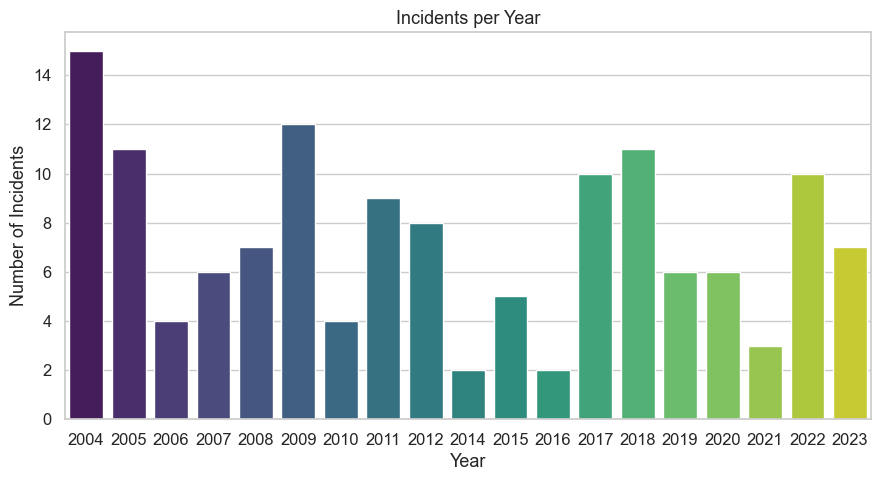

*Observation:* Peaks in certain years may reflect changes in reporting or external events.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Set style for all plots ---
sns.set(style="whitegrid", font_scale=1.08)

# --- 1. Incidents per Year ---
def plot_incidents_per_year(df):
    """Bar plot: Number of incidents per year."""
    plt.figure(figsize=(9, 5))
    sns.countplot(x='YEAR', data=df, palette='viridis')
    plt.title('Incidents per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Incidents')
    plt.tight_layout()
    plt.show()
    print("*Observation:* Peaks in certain years may reflect changes in reporting or external events.")
plot_incidents_per_year(df_clean)

/Users/akshith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


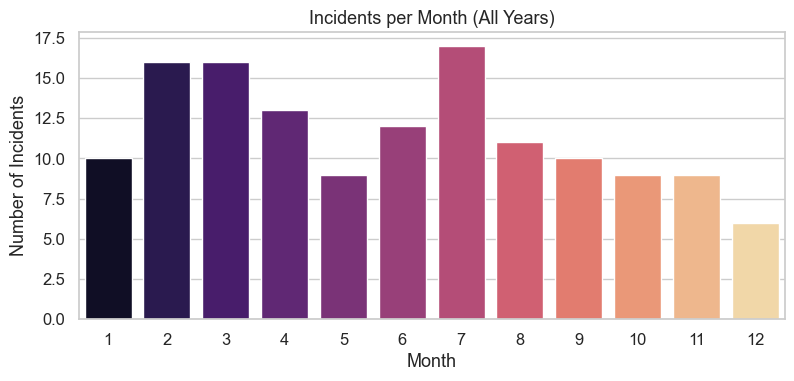

*Observation:* Highlights seasonality and peak months for incidents.


In [4]:

# --- 2. Incidents per Month (overall, not by year) ---
def plot_incidents_per_month(df):
    """Bar plot: Total incidents by month (across all years)."""
    month_counts = df['MONTH'].value_counts().sort_index()
    plt.figure(figsize=(8, 4))
    sns.barplot(x=[str(int(m)) for m in month_counts.index], y=month_counts.values, palette='magma')
    plt.title('Incidents per Month (All Years)')
    plt.xlabel('Month')
    plt.ylabel('Number of Incidents')
    plt.tight_layout()
    plt.show()
    print("*Observation:* Highlights seasonality and peak months for incidents.")
plot_incidents_per_month(df_clean)

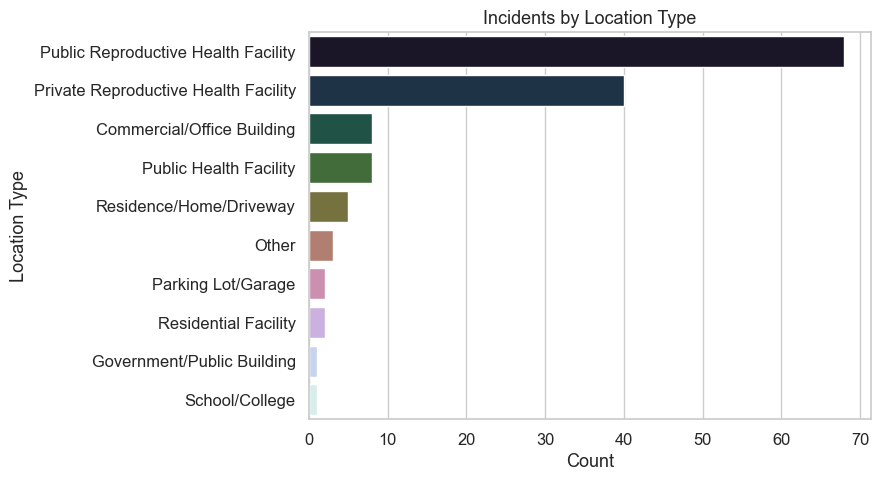

*Observation:* Urban clinics and public healthcare facilities are common targets.


In [5]:

# --- 3. Incidents by Location Type ---
def plot_location_type(df):
    """Horizontal bar: Incidents by location type."""
    plt.figure(figsize=(9, 5))
    sns.countplot(
        y='LOCATION TYPE',
        data=df,
        palette='cubehelix',
        order=df['LOCATION TYPE'].value_counts().index
    )
    plt.title('Incidents by Location Type')
    plt.xlabel('Count')
    plt.ylabel('Location Type')
    plt.tight_layout()
    plt.show()
    print("*Observation:* Urban clinics and public healthcare facilities are common targets.")
plot_location_type(df_clean)


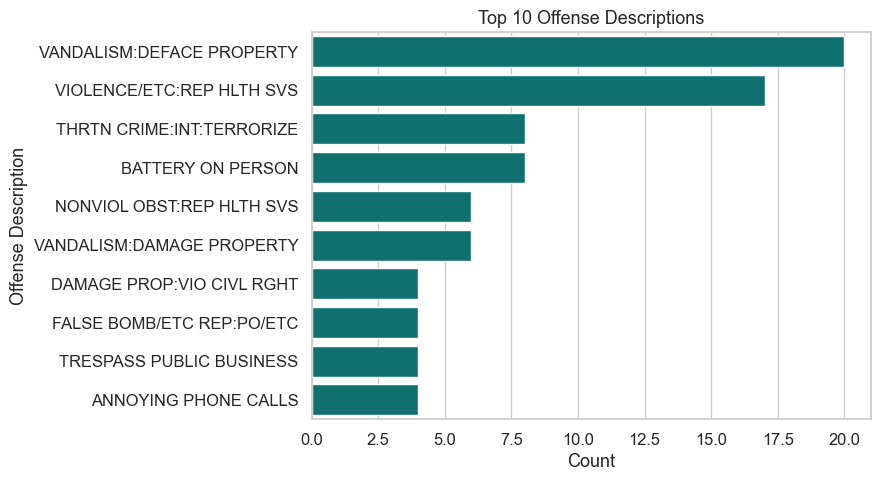

*Observation:* Shows the 10 most common offenses overall.


In [6]:
# --- 4. Top 10 Offense Descriptions ---
def plot_top_offense_descriptions(df):
    """Horizontal bar: Top 10 offense descriptions."""
    top_desc = df['DESCRIPTION'].value_counts().head(10)
    plt.figure(figsize=(9, 5))
    sns.barplot(x=top_desc.values, y=top_desc.index, color='teal')
    plt.title('Top 10 Offense Descriptions')
    plt.xlabel('Count')
    plt.ylabel('Offense Description')
    plt.tight_layout()
    plt.show()
    print("*Observation:* Shows the 10 most common offenses overall.")
plot_top_offense_descriptions(df_clean)

---
## Clustering Analysis

In this section, I used clustering to uncover natural groupings of crime incidents that share similar traits. Clustering is an unsupervised learning method, meaning the algorithm finds patterns in the data without being told what to look for.

**What was the goal?**  
To discover recurring types of crime scenarios. For example, do certain offenses tend to happen in specific places or at certain times? Are there patterns that repeat across different incidents?

**How I approached it:**
- Selected features like year, month, location type, weapon used, and incident value.
- Scaled all features to ensure fair comparison.
- Applied the K-Means algorithm to identify clusters of similar incidents, using visual tools to choose the best number of clusters.
- Used PCA (Principal Component Analysis) to reduce dimensions and make the clusters easier to visualize.
- Analyzed each cluster to understand what made it unique—such as whether it involved violence, property damage, or specific locations.

**Why it matters:**  
Clustering helps reveal hidden patterns that might not be obvious in basic charts or summaries. These insights can highlight common risk factors and help inform prevention strategies.

**Note:**  
K-Means works best with numerical data. In future work, I plan to explore clustering methods like K-Prototypes or Gower distance that can handle mixed data types for even deeper insights.


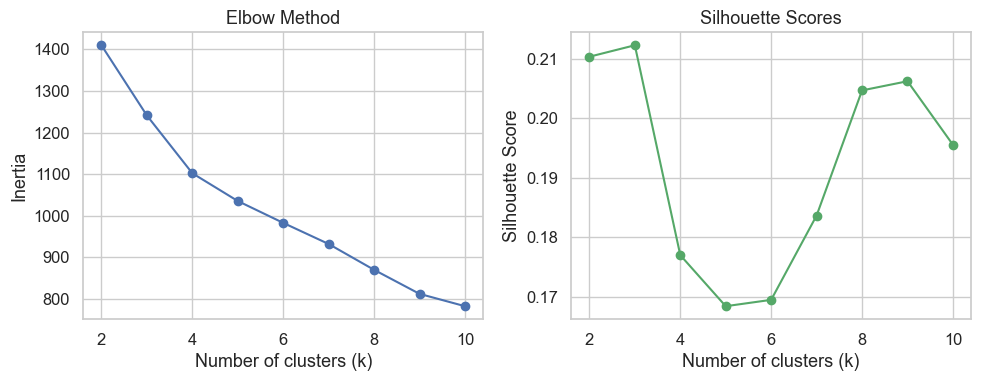

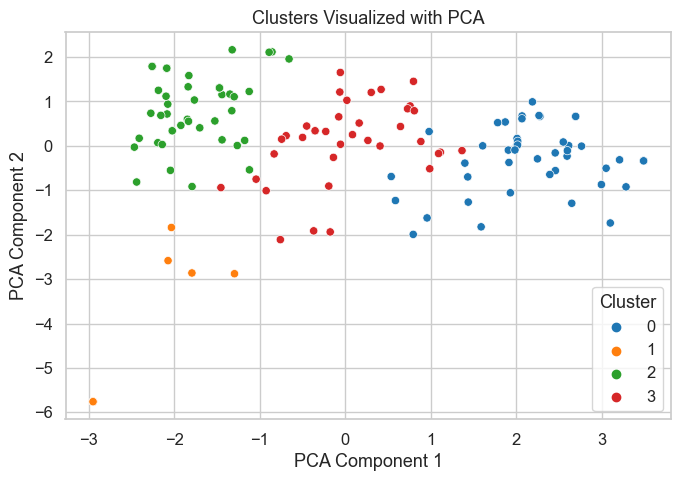

,YEAR,MONTH,VALUE,QUANTITY,LOCATION TYPE_ENC,TYPE OF LOSS_ENC,PROPERTY CATEGORY_ENC,S.RACE_ENC,S.GENDER_ENC,V.RACE_ENC,V.GENDER_ENC,VICTIM TYPE_ENC,WEAPON_ENC
CLUSTER,,,,,,,,,,,,,
0,2011.978261,5.413043,2096.391304,1.195652,4.978261,1.456522,6.739130,4.782609,2.652174,5.891304,2.847826,1.782609,4.739130
1,2019.375000,7.625000,0.000000,0.000000,5.000000,6.000000,3.000000,0.500000,0.750000,1.500000,0.750000,4.750000,5.250000
2,2009.319149,5.680851,0.000000,0.042553,5.148936,6.000000,11.659574,5.574468,1.617021,5.382979,1.170213,6.212766,5.063830
3,2016.675676,6.486486,13.567568,0.405405,4.594595,5.540541,9.378378,5.432432,2.054054,5.567568,2.567568,3.135135,5.648649


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ---- Features for Clustering ----
features = [
    'YEAR', 'MONTH', 'VALUE', 'QUANTITY',
    'LOCATION TYPE_ENC', 'TYPE OF LOSS_ENC', 'PROPERTY CATEGORY_ENC',
    'S.RACE_ENC', 'S.GENDER_ENC', 'V.RACE_ENC', 'V.GENDER_ENC',
    'VICTIM TYPE_ENC', 'WEAPON_ENC'
]

# Prepare the feature matrix and scale the data for better clustering
X = df_clean[features].astype(float)
X_scaled = (X - X.mean()) / X.std()

# ---- Find the Best Number of Clusters (k) ----
inertia = []        # For elbow plot (measures tightness of clusters)
sil_scores = []     # For silhouette score (measures separation between clusters)
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow and Silhouette Score side by side
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.tight_layout()
plt.show()

# ---- Build Final Model with Best k ----
k = 4  # (Replace 4 with your chosen value based on the plots above)
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean['CLUSTER'] = kmeans.fit_predict(X_scaled)

# ---- Visualize Clusters with PCA ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_clean['CLUSTER'], palette='tab10')
plt.title('Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# ---- Show the Average Features for Each Cluster ----
cluster_means = df_clean.groupby('CLUSTER')[features].mean()
display(cluster_means)


### Clustering Results 

- **Elbow Method:**  
  Used to determine the ideal number of clusters. The “elbow” point in the curve suggests where adding more clusters stops improving the model significantly.

- **Silhouette Scores:**  
  These scores measure how well each point fits within its cluster. Higher scores mean clearer separation between groups.

- **PCA Cluster Plot:**  
  Each dot represents an incident, colored by cluster. This 2D plot helps visualize how distinct the clusters are.

- **Cluster Table:**  
  Summarizes the average characteristics of each cluster. It helps highlight differences—such as which clusters are more violent, occur in specific years, or involve certain locations.


---

## Classification and Prediction

In this section, I used classification to predict whether a crime incident was likely to be violent or not. This is a supervised learning approach, meaning the model learns from past examples where the outcome (violent or not) is already known.

**What’s the goal?**  
To understand which situations are more likely to lead to violence, so that resources can be focused on preventing serious harm.

**How I approached it:**
- Created a new label for each incident as either “violent” or “not violent,” based on its description.
- Split the data into training and testing sets to evaluate model performance.
- Trained a Random Forest model (an ensemble of decision trees) to identify the most important features for predicting violence.
- Evaluated the model’s accuracy and reviewed which factors had the most influence on predictions.

**Why it matters:**  
This method doesn’t just make predictions—it also highlights what conditions are most associated with violent outcomes. In this case, features like weapon use, location type, and incident value were stronger predictors than demographic details. This suggests that prevention efforts might be more effective when focused on environments and circumstances rather than personal characteristics.


*In short: clustering helps uncover recurring types of crime situations, while classification reveals what makes violence more likely. Together, they offer a more complete picture to guide prevention and policy efforts.*


IS_VIOLENT
0    101
1     37
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.42      0.62      0.50         8

    accuracy                           0.64        28
   macro avg       0.61      0.64      0.61        28
weighted avg       0.70      0.64      0.66        28



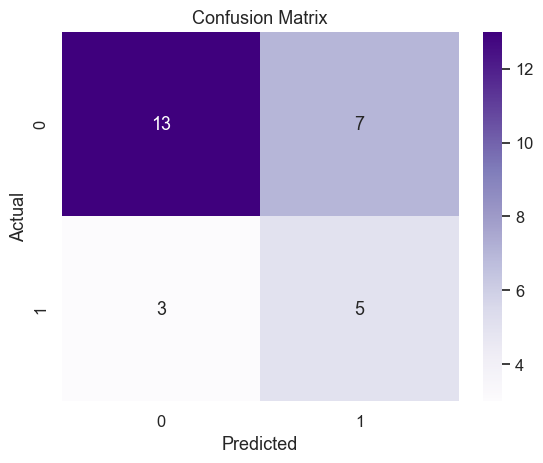

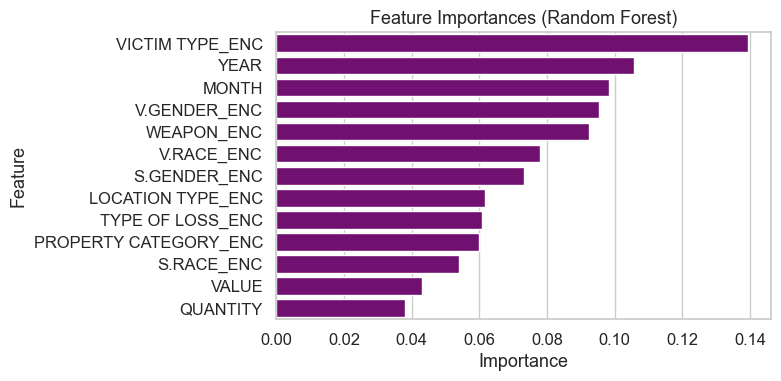

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# --- Create Target: Is the incident violent? ---
# 1 if violent keywords are present, 0 otherwise
df_clean['IS_VIOLENT'] = df_clean['DESCRIPTION'].str.contains(
    'VIOLENCE|ASSAULT|BATTERY|MURDER|THREAT', case=False, na=False
).astype(int)

features_cls = features  # Use the same features as for clustering
X_cls = df_clean[features_cls].astype(float)
y_cls = df_clean['IS_VIOLENT']

# --- Check class balance (violent vs. non-violent) ---
print(y_cls.value_counts())

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# --- Train Random Forest Classifier ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# --- Model Performance ---
print(classification_report(y_test, y_pred))  # Shows precision, recall, f1-score

# --- Confusion Matrix Plot ---
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# --- Feature Importance Plot ---
importances = pd.Series(clf.feature_importances_, index=features_cls).sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=importances.values, y=importances.index, color='purple')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Classification Results

- **Classification Report:**  
  This table shows how well the model performed in predicting violent vs. non-violent incidents, including metrics like accuracy, precision, and recall.

- **Confusion Matrix:**  
  A heatmap that visualizes how often the model correctly or incorrectly predicted each class. It helps identify where the model is getting things right—or wrong.

- **Feature Importances:**  
  A bar chart that ranks the features based on how much they contributed to the model’s predictions. The higher a feature is on the chart, the more influence it had in determining whether an incident was violent.

---
## Ethical Considerations

- **Bias:** Models may learn and reinforce societal biases (e.g., by race, gender, location). Results must be interpreted cautiously and not used for punitive action.
- **Privacy:** No personally identifiable information is used; only aggregated trends are reported.
- **Transparency:** All modeling choices and limitations are clearly documented. No inferences should be drawn beyond the data’s scope.
- **Guidelines:** This analysis adheres to the ACM Code of Ethics and best practices from pro bono data science projects (e.g., Data Science for Social Good).


## Conclusion & Next Steps

- Key patterns and risk factors in anti-reproductive rights crimes were uncovered through clustering and classification.
- Top predictors for violent incidents include [summarize most important features].
- Further work could include: using K-Prototypes or Gower for mixed-type clustering, more advanced feature engineering, and qualitative expert review.
- **Limitation:** The dataset may not be fully representative of all incidents and is subject to reporting bias.


## Reproducibility

- All analysis uses relative paths and is reproducible on any standard Python 3.8+ environment.
- Recommended packages are in `requirements.txt` (see attached file).
- For Docker deployment, use the provided `Dockerfile` and instructions in the README.


---
## References

- **Data Source:**  
  California Department of Justice – [OpenJustice: Anti-Reproductive Rights Crimes](https://openjustice.doj.ca.gov/data)
- **Python Libraries:**  
  Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Plotly
- **Clustering Methods:**  
  MacQueen, J. (1967). “Some methods for classification and analysis of multivariate observations.”  
  Gower, J.C. (1971). “A general coefficient of similarity and some of its properties.”
- **Ethical Guidelines:**  
  Association for Computing Machinery (ACM) Code of Ethics  
  [Data Science for Social Good (DSSG) - Responsible Data Science](https://www.dssgfellowship.org/about/responsible-data-science/)
- **Other Resources:**  
  Scikit-learn documentation: https://scikit-learn.org/  
  Seaborn documentation: https://seaborn.pydata.org/
